In [21]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
import cv2

print("Hello Open Cv", cv2.__version__)
img = cv2.imread("cat.bmp")

if img is None:
    print("Image load failed")
    sys.exit()

cv2.namedWindow(
    "image"
)  # image 라는 이름의 창을 설정하는것이지만 이름외에 다른 설정이 필요하지 않으면 생략해도 됨
cv2.imshow("image", img)
cv2.waitKey()

cv2.destroyAllWindows()

Hello Open Cv 4.11.0


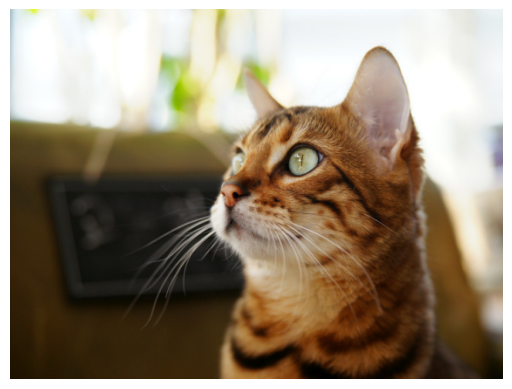

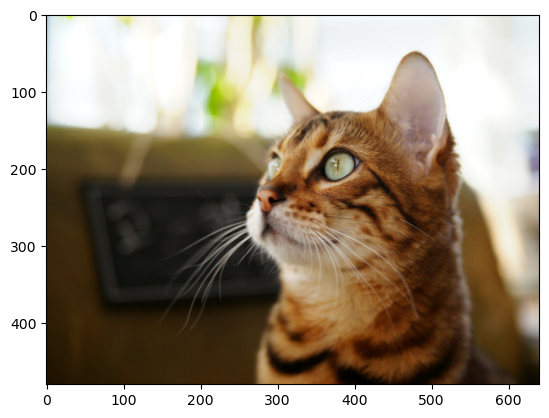

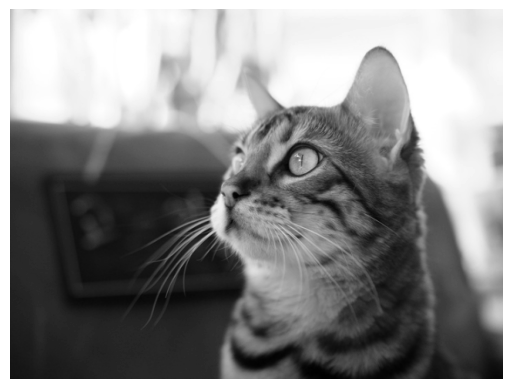

In [ ]:
import matplotlib.pyplot as plt
import cv2

# 컬러 영상 출력
imgBGR = cv2.imread("cat.bmp")
imgRGB = cv2.cvtColor(
    imgBGR, cv2.COLOR_BGR2RGB
)  # openCV 는 순서가 BGR 이고 매트플롯은 RGB 이므로 컨버팅이 필요함

plt.axis("off")
plt.imshow(imgRGB)
plt.show()

plt.imshow(imgRGB)
plt.show()

# 그레이스케일 영상 출력
imgGray = cv2.imread(
    "cat.bmp", cv2.IMREAD_GRAYSCALE
)  # 그레이스케일은 RGB가 없으므로 컨버팅 필요하지않음

plt.axis(
    "off"
)  # axis를 on 하면 x, y 축 숫자가 나오므로 off 해서 이미지만 나오게 설정함
plt.imshow(imgGray, cmap="gray")  # 대신 imshow() 에서 cmap 설정을 gray 로 줌
plt.show()

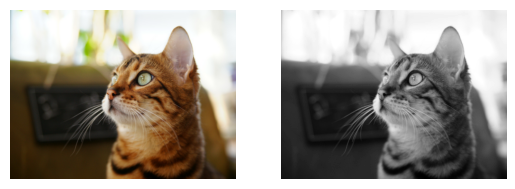

In [ ]:
# 여러 영상출력
import matplotlib.pyplot as plt
import cv2

# 컬러 영상 & 그레이스케일 영상 불러오기
imgBRG = cv2.imread("cat.bmp")
imgRgB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.imread("cat.bmp", cv2.IMREAD_GRAYSCALE)

# 두 개의 영상을 함께 출력
plt.subplot(121), plt.axis("off"), plt.imshow(imgRGB)
plt.subplot(122), plt.axis("off"), plt.imshow(imgGray, cmap="gray")
plt.show()

In [2]:
# 여러 이미지 읽어오기
import os

file_list = os.listdir(".\\images")
img_files = [
    os.path.join(".\\images", file) for file in file_list if file.endswith(".jpg")
]
img_files

['.\\images\\autumn_forest_park_128379_1920x1080.jpg',
 '.\\images\\boat_mountains_lake_135258_1920x1080.jpg',
 '.\\images\\forest_fog_trees_128751_1920x1080.jpg',
 '.\\images\\pier_dock_sea_dusk_shore_118549_1920x1080.jpg',
 '.\\images\\road_marking_evening_clouds_horizon_120298_1920x1080.jpg']

In [8]:
import glob

img_files = glob.glob(".\\images\\*.jpg")
img_files

['images\\autumn_forest_park_128379_1920x1080.jpg',
 'images\\boat_mountains_lake_135258_1920x1080.jpg',
 'images\\forest_fog_trees_128751_1920x1080.jpg',
 'images\\pier_dock_sea_dusk_shore_118549_1920x1080.jpg',
 'images\\road_marking_evening_clouds_horizon_120298_1920x1080.jpg']

In [9]:
import cv2

cnt = len(img_files)
idx = 0

# 먼저 cv2.window_normal 속성의 창을 만든 후, cv2.setwindowproperty() 함수를 사용하여 전체 화면 속서응로 변경
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.setWindowProperty("image", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

while True:
    img = cv2.imread(img_files[idx])

    if img is None:
        print("Image load filed!")
        break

    cv2.imshow("image", img)
    if cv2.waitKey(1000) >= 0:
        cv2.destroyAllWindows()
        break

    idx += 1
    if idx >= cnt:
        idx = 0

In [ ]:
import cv2

# 영상데이터 numpy.ndarray 로 표현하기
img1 = cv2.imread("cat.bmp", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("cat.bmp", cv2.IMREAD_COLOR)

print(
    f"img1(gray) ndim: {img1.ndim}, shape: {img1.shape}, size: {img1.size}, dtype:{img1.dtype}"
)
print(
    f"img2(gray) ndim: {img2.ndim}, shape: {img2.shape}, size: {img2.size}, dtype:{img2.dtype}"
)

img1(gray) ndim: 2, shape: (480, 640), size: 307200, dtype:uint8
img2(gray) ndim: 3, shape: (480, 640, 3), size: 921600, dtype:uint8


480

In [ ]:
# 영상의 속성 참조 예제
import cv2

img1 = cv2.imread("cat.bmp", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("cat.bmp", cv2.IMREAD_COLOR)

print("type(img1):", type(img1))
print(f"img1.shape: {img1.shape}")
print(f"img2.shape: {img2.shape}")
print(f"img2.dtype: {img2.dtype}")

h, w = img2.shape[:2]
print(f"img2 size: {w} x {h}")

if len(img1.shape) == 2:
    print("img1 is a grayscale image")
elif len(img1.shape) == 3:
    print("img1 is a truecolor image")

type(img1): <class 'numpy.ndarray'>
img1.shape: (480, 640)
img2.shape: (480, 640, 3)
img2.dtype: uint8
img2 size: 640 x 480
img1 is a grayscale image


2

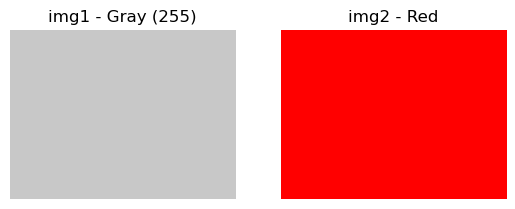

In [42]:
# 영상의 픽셀 값 참조 예제
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("cat.bmp", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("cat.bmp", cv2.IMREAD_COLOR)

h, w = img2.shape[:2]

# for문으로 픽셀값을 변경하는 작업은 매우 느리므로 방법만 확인하고 실제로는 사용금지
for y in range(h):
    for x in range(w):
        img1[y, x] = 200
        img2[y, x] = [0, 0, 255]

img1[:, :]
img2[:, :]
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.title("img1 - Gray (255)")
plt.axis("off")
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("img2 - Red")
plt.axis("off")
plt.imshow(img2_rgb)

plt.show()

In [41]:
import numpy as np

np1 = np.empty((2, 2), np.uint8)
print(np1)
np2 = np.zeros((2, 2), np.uint8)
print(np2)
np3 = np.ones((2, 2), np.uint8)
print(np3)
np4 = np.full((2, 2), 255, np.uint8)
print(np4)

[[255 255]
 [255 255]]
[[0 0]
 [0 0]]
[[1 1]
 [1 1]]
[[255 255]
 [255 255]]


In [ ]:
import numpy as np
import cv2

img1 = np.empty((480, 640), dtype=np.uint8)
img2 = np.zeros((480, 640, 3), dtype=np.uint8)
img3 = np.ones((480, 640), dtype=np.uint8) * 255
img4 = np.full((480, 640, 3), (0, 255, 255), dtype=np.uint8)

cv2.namedWindow("img1")
cv2.namedWindow("img2")
cv2.namedWindow("img3")
cv2.namedWindow("img4")
cv2.imshow("img1", img1)
cv2.imshow("img3", img3)
cv2.imshow("img4", img4)
cv2.waitKey()
cv2.destroyAllWindows()

아이디 비교 : 2242359344464, 2242359344464 2242350962928


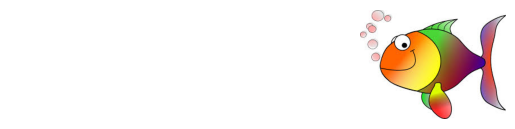

In [50]:
# 영상의 참조 및 복사
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("HappyFish.jpg")

img2 = img1  # img1 이 변경될때 img2도 변경됨
img3 = img1.copy()

img1.fill(255)

print(f"아이디 비교 : {id(img1)}, {id(img2)} {id(img3)}")

plt.subplot(131)
plt.axis("off")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.axis("off")
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

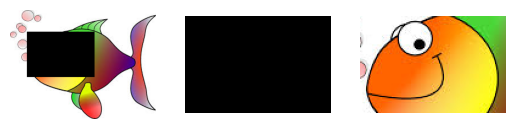

In [ ]:
# 영상의 생성, 복사, 부분 영상 추출
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("HappyFish.jpg")

img2 = img1[40:120, 30:150]
img3 = img1[40:120, 30:150].copy()

img2.fill(0)

plt.subplot(131)
plt.axis("off")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.axis("off")
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

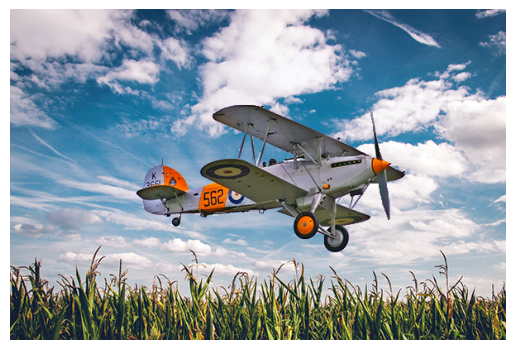

In [67]:
# 마스크 연산
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("airplane.bmp", cv2.IMREAD_COLOR)
mask = cv2.imread("mask_plane.bmp", cv2.IMREAD_GRAYSCALE)
dst = cv2.imread("field.bmp", cv2.IMREAD_COLOR)

# src, mask, dst 는 모두 크기가 같아야함
# src, dst 는 타입이 같아야하고 mask 는 그레이스케일
# 결과가 dst에 저장됨
cv2.copyTo(src, mask, dst)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

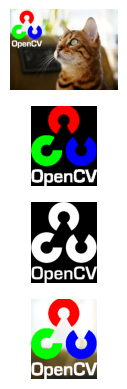

In [91]:
# 마스크 연간과 ROI
import cv2
import matplotlib.pyplot as plt
import sys

# 알파 채널을 마스크 영상으로 이용
src = cv2.imread("cat.bmp", cv2.IMREAD_COLOR)
logo = cv2.imread(
    "opencv-logo-white.png", cv2.IMREAD_UNCHANGED
)  # png 는 투명도 (알파값) 이 있기때문에 imread_unchanged 를 사용

if src is None or logo is None:
    print("Image load failed!")
    sys.exit()

mask = logo[:, :, 3]
logo2 = logo[:, :, :-1]
h, w = mask.shape[:2]
crop = src[10 : 10 + h, 10 : 10 + w]

cv2.copyTo(logo2, mask, crop)

plt.subplot(411)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(412)
plt.axis("off")
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.subplot(413)
plt.axis("off")
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.subplot(414)
plt.axis("off")
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

In [ ]:
# 카메라 처리 예제
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    invered = ~frame

    cv2.imshow("frame", frame)
    cv2.imshow("invered", invered)

    if cv2.waitKey(10) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
# 동영상처리 예제
import cv2

cap = cv2.VideoCapture("video1.mp4")

fps = round(cap.get(cv2.CAP_PROP_FPS))
delay = round(1000 / fps)

while True:
    ret, frame = cap.read()
    if ret == False:
        break

    inversed = ~frame

    cv2.imshow("frame", frame)
    cv2.imshow("inversed", inversed)

    if cv2.waitKey(delay) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [2]:
# 카메라와 동영상 처리하기 2
import cv2

cap = cv2.VideoCapture(0)

w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"DIVX")
out = cv2.VideoWriter("output.avi", fourcc, 30, (w, h))

while True:
    ret, frame = cap.read()

    inversed = ~frame
    out.write(inversed)

    cv2.imshow("frame", frame)
    cv2.imshow("inversed", inversed)
    if cv2.waitKey(10) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [6]:
import sys
import numpy as np
import cv2


# 두 개의 동영상을 열어서 cap1, cap2로 지정
cap1 = cv2.VideoCapture("video1.mp4")
cap2 = cv2.VideoCapture("video2.mp4")

# 두 동영상의 크기, FPS는 같다고 가정함
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap1.get(cv2.CAP_PROP_FPS)
effect_frames = int(fps * 2)

print("frame_cnt1:", frame_cnt1)
print("frame_cnt2:", frame_cnt2)
print("effect_frames:", effect_frames)
print("FPS:", fps)

delay = int(1000 / fps)

w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"DIVX")

# 출력 동영상 객체 생성
out = cv2.VideoWriter("output.avi", fourcc, fps, (w, h))

# 1번 동영상 복사
for i in range(frame_cnt1 - effect_frames):
    ret1, frame1 = cap1.read()

    if not ret1:
        print("frame read error!")
        sys.exit()

    out.write(frame1)
    print(".", end="")

    cv2.imshow("output", frame1)
    cv2.waitKey(delay)

# 1번 동영상 뒷부분과 2번 동영상 앞부분을 합성
for i in range(effect_frames):
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()

    if not ret1 or not ret2:
        print("frame read error!")
        sys.exit()

    dx = int(w / effect_frames) * i

    frame = np.zeros((h, w, 3), dtype=np.uint8)
    frame[:, 0:dx, :] = frame2[:, 0:dx, :]
    frame[:, dx:w, :] = frame1[:, dx:w, :]

    # alpha = i / effect_frames
    # frame = cv2.addWeighted(frame1, 1 - alpha, frame2, alpha, 0)

    out.write(frame)
    print(".", end="")

    cv2.imshow("output", frame)
    cv2.waitKey(delay)

# 2번 동영상을 복사
for i in range(effect_frames, frame_cnt2):
    ret2, frame2 = cap2.read()

    if not ret2:
        print("frame read error!")
        sys.exit()

    out.write(frame2)
    print(".", end="")

    cv2.imshow("output", frame2)
    cv2.waitKey(delay)

print("\noutput.avi file is successfully generated!")

cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

frame_cnt1: 85
frame_cnt2: 121
effect_frames: 48
FPS: 24.0
..............................................................................................................................................................
output.avi file is successfully generated!
